<a href="https://colab.research.google.com/github/duckmhd201/DataAnalystDeepLearning/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PHẦN 1: DATA CLEANSING & FEATURE ENGINEERING**

1.Viết hàm load_data() để tải dữ liệu lên ứng dụng.Sau đó, hiển thị ra màn hình 10 dòng đầu tiên.


In [11]:
import pandas as pd
def load_data():
  return pd.read_csv("https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/titanic_disaster.csv")
load_data().head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


2.Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heat map). Hãy cho nhận xét về tình trạng thiếu dữ liệu Age, Cabin và Embarked

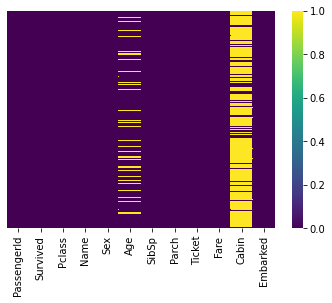

In [12]:
import seaborn as sns
sns.heatmap(load_data().isna(), 
            yticklabels=False, 
            cbar=True, 
            cmap='viridis')

3.Xử lý tên cột tên Name, tách ra làm 2 cột: firstName và secondName.

In [13]:
dt = load_data()
dt[['firstName','secondName']]=dt['Name'].str.split(",",expand = True)
newdt=dt.drop('Name', axis = 1)
newdt.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry
5,6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q,Moran,Mr. James
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S,McCarthy,Mr. Timothy J
7,8,0,3,male,2.0,3,1,349909,21.0750,NaN,S,Palsson,Master. Gosta Leonard
8,9,1,3,female,27.0,0,2,347742,11.1333,NaN,S,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9,10,1,2,female,14.0,1,0,237736,30.0708,NaN,C,Nasser,Mrs. Nicholas (Adele Achem)


4. Xứ lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male thành M và female thành F

In [15]:
newdt.loc[newdt['Sex'] == 'male', 'Sex'] = 'M'
newdt.loc[newdt['Sex'] == 'female', 'Sex'] = 'F'
newdt.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


5.Xử lý dữ liệu thiếu trên biến Age bằng cách thay thế bằng giá trị trung bình tuổi: Hãy đưa ra quyết định dùng giá trị trung bình tuổi toàn bộ hành khách hay theo từng nhóm hạng vé (hạng hành khách: Pclass).

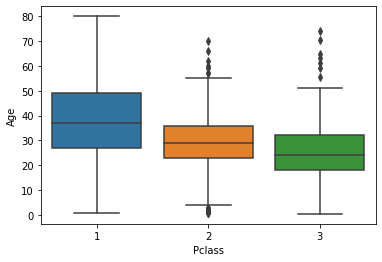

In [16]:
sns.boxplot(y = 'Age', x='Pclass', data=newdt)

In [18]:
newdt['Age'].fillna(newdt['Age'].mean(), inplace = True)
newdt.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


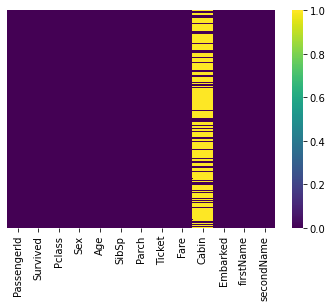

In [19]:
sns.heatmap(newdt.isna(),
            yticklabels = False,
            cbar = True,
            cmap = 'viridis')

6.Xây dựng biến số Agegroup có thang đo thứ tự được ánh xạ theo thang đo khoảng dựa trên độ tuổi của hành khách như sau: (age =< 12]  Kid; (12, 18]: Teen, (18, 60]: Adult và ( age > 60): Older

In [20]:
newdt.loc[newdt['Age'] <= 12, 'Agegroup'] = 'Kid'
newdt.loc[(newdt['Age'] > 12) & (newdt['Age'] <= 18), 'Agegroup'] ='Teen'
newdt.loc[(newdt['Age'] > 18) & (newdt['Age'] <= 60), 'Agegroup'] = 'Adult'
newdt.loc[newdt['Age'] > 60, 'Agegroup'] = 'Older'
newdt.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,Agegroup
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult


7.Tiến hành thêm đặc trưng về danh xưng (namePrefix) trong xã hội bằng cách tách Mr, Mrs, Miss, Master ra khỏi ―secondName

In [22]:
newdt[['namePrefix','secondName' ]] =newdt['secondName'].str.split('. ',1,expand = True)
newdt.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,Agegroup,namePrefix
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Harris,Adult,Owe
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Bradley (Florence Briggs Thayer),Adult,Joh
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,None,Adult,Laina
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Heath (Lily May Peel),Adult,Jacque
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Henry,Adult,Willia


8.Khai thác thêm thông tin số lượng thành viên đi theo nhóm thân quen (familySize) đối với mỗi hành khách trên chuyến hải trình; family size = 1+ SibSp + Parch

In [25]:
newdt['familySize'] = 1+newdt.SibSp+newdt.Parch
newdt.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,Agegroup,namePrefix,familySize
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Harris,Adult,Owe,2
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Bradley (Florence Briggs Thayer),Adult,Joh,2
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,None,Adult,Laina,1
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Heath (Lily May Peel),Adult,Jacque,2
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Henry,Adult,Willia,1


9.Tạo thêm đặc trưng ‗Alone‘ để xác định hành khách đi theo nhóm hay cá nhân bằng cách dựa trên familySize như sau: Nếu familySize = 0 thì giá trị Alone = 1 và ngược lại là 0.

In [26]:
newdt.loc[newdt['familySize'] == 0, 'Alone'] = '1'
newdt.loc[newdt['familySize'] >= 1, 'Alone'] = '0'
newdt.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,Agegroup,namePrefix,familySize,Alone
0,1,0,3,M,22.000000,1,0,A/5 21171,7.2500,NaN,S,Braund,Harris,Adult,Owe,2,0
1,2,1,1,F,38.000000,1,0,PC 17599,71.2833,C85,C,Cumings,Bradley (Florence Briggs Thayer),Adult,Joh,2,0
2,3,1,3,F,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,None,Adult,Laina,1,0
3,4,1,1,F,35.000000,1,0,113803,53.1000,C123,S,Futrelle,Heath (Lily May Peel),Adult,Jacque,2,0
4,5,0,3,M,35.000000,0,0,373450,8.0500,NaN,S,Allen,Henry,Adult,Willia,1,0
5,6,0,3,M,29.699118,0,0,330877,8.4583,NaN,Q,Moran,None,Adult,James,1,0
6,7,0,1,M,54.000000,0,0,17463,51.8625,E46,S,McCarthy,J,Adult,Timoth,1,0
7,8,0,3,M,2.000000,3,1,349909,21.0750,NaN,S,Palsson,Leonard,Kid,Gost,5,0
8,9,1,3,F,27.000000,0,2,347742,11.1333,NaN,S,Johnson,W (Elisabeth Vilhelmina Berg),Adult,Osca,3,0
9,10,1,2,F,14.000000,1,0,237736,30.0708,NaN,C,Nasser,(Adele Achem),Teen,Nichola,2,0


10.Tiến hành tách loại cabin (typeCabin) mà hành khách ở để lọc và phân tích đặc tính cabin. Loại cabin được kí hiệu bởi chữ cái đầu tiên. Lưu ý: Đối với dữ liệu cabin bị thiếu thì thay thế bằng ―Unknown

In [27]:
newdt['typeCabin']=newdt['Cabin']
newdt1 =newdt
newdt1['typeCabin'].fillna('Unknown', inplace = True)
newdt1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,Agegroup,namePrefix,familySize,Alone,typeCabin
0,1,0,3,M,22.000000,1,0,A/5 21171,7.2500,NaN,S,Braund,Harris,Adult,Owe,2,0,Unknown
1,2,1,1,F,38.000000,1,0,PC 17599,71.2833,C85,C,Cumings,Bradley (Florence Briggs Thayer),Adult,Joh,2,0,C85
2,3,1,3,F,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,None,Adult,Laina,1,0,Unknown
3,4,1,1,F,35.000000,1,0,113803,53.1000,C123,S,Futrelle,Heath (Lily May Peel),Adult,Jacque,2,0,C123
4,5,0,3,M,35.000000,0,0,373450,8.0500,NaN,S,Allen,Henry,Adult,Willia,1,0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,M,27.000000,0,0,211536,13.0000,NaN,S,Montvila,None,Adult,Juozas,1,0,Unknown
887,888,1,1,F,19.000000,0,0,112053,30.0000,B42,S,Graham,Edith,Adult,Margare,1,0,B42
888,889,0,3,F,29.699118,1,2,W./C. 6607,23.4500,NaN,S,Johnston,"Helen ""Carrie""",Adult,Catherin,4,0,Unknown
889,890,1,1,M,26.000000,0,0,111369,30.0000,C148,C,Behr,Howell,Adult,Kar,1,0,C148


**PHẦN 2: KHAI THÁC THÔNG TIN HỮU ÍCH – EDA**